# Predicting Student Academic Performance Using Tree-Based Models

## Objective
To build and compare Decision Tree and Random Forest classifiers to predict
whether a student will **Pass or Fail** based on academic and socio-economic features.

## Models Used
- Decision Tree Classifier
- Random Forest Classifier


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [39]:
df = pd.read_csv("student-por.csv",sep = ";")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Dataset Overview

The dataset contains demographic, academic, and behavioral attributes
that influence student performance.


In [40]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [41]:
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [42]:
df['G3'].value_counts()


G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

**Observation:**  
The dataset contains minimal/no missing values.
Final grades show a clear distribution suitable for binary classification.



--- Correlation Matrix ---
                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.107832 -0.121050    0.034490  -0.008415  0.319968   
Medu       -0.107832  1.000000  0.647477   -0.265079   0.097006 -0.172210   
Fedu       -0.121050  0.647477  1.000000   -0.208288   0.050400 -0.165915   
traveltime  0.034490 -0.265079 -0.208288    1.000000  -0.063154  0.097730   
studytime  -0.008415  0.097006  0.050400   -0.063154   1.000000 -0.147441   
failures    0.319968 -0.172210 -0.165915    0.097730  -0.147441  1.000000   
famrel     -0.020559  0.024421  0.020256   -0.009521  -0.004127 -0.062645   
freetime   -0.004910 -0.019686  0.006841    0.000937  -0.068829  0.108995   
goout       0.112805  0.009536  0.027690    0.057454  -0.075442  0.045078   
Dalc        0.134768 -0.007018  0.000061    0.092824  -0.137585  0.105949   
Walc        0.086357 -0.019766  0.038445    0.057007  -0.214925  0.082266   
health     -0.008750  0.004614  0.044910   -0.04

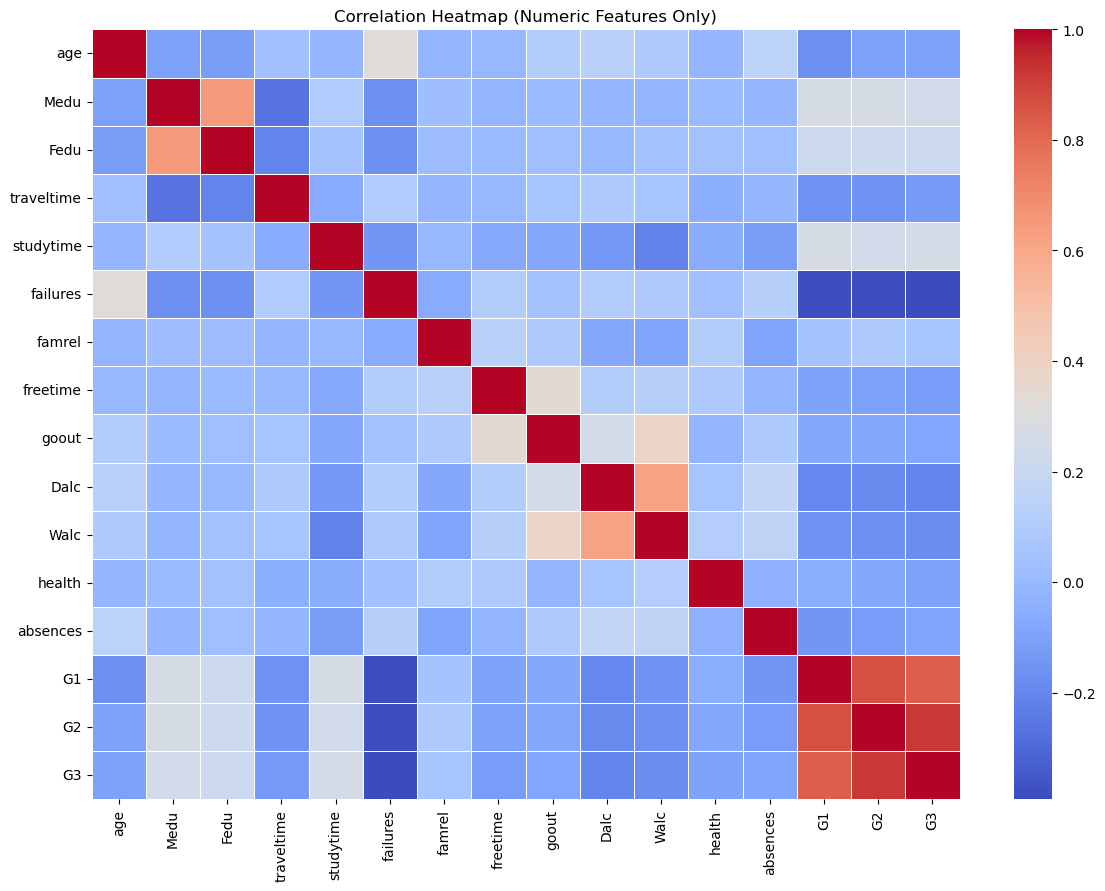

In [43]:
# Compute correlation only for numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

print("\n--- Correlation Matrix ---")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

**Observation:**  
Study time, past Grades, Menu and Fedu show noticeable correlation with student performance,
while absences negatively impact final outcomes.


## Target Variable: Pass / Fail Conversion

Students scoring **10 or above** are labeled as **Pass (1)**,
and below 50 as **Fail (0)**.


In [44]:
df['G3'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


In [45]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [46]:
X = df.drop(['G3', 'school','sex', 'address', 'reason'], axis=1)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)


In [47]:
dt_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(random_state=42))
])


In [48]:
rf_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])


In [49]:
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

## Hyperparameter Tuning using GridSearchCV


In [57]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
rf_pipeline = grid_rf.best_estimator_


## Model Evaluation/ Accuracy

In [58]:
dt_results = evaluate(dt_pipeline, X_test, y_test)
rf_results = evaluate(rf_pipeline, X_test, y_test)

results_df = pd.DataFrame(
    [dt_results, rf_results],
    index=["Decision Tree Pipeline", "Random Forest Pipeline"]
)
results_df


,Accuracy,Precision,Recall,F1
Decision Tree Pipeline,0.892308,0.93578,0.935780,0.935780
Random Forest Pipeline,0.900000,0.90678,0.981651,0.942731


In [ ]:
dt_results = evaluate(dt_model, X_test, y_test)
rf_results = evaluate(best_rf, X_test, y_test)

results_df = pd.DataFrame([dt_results, rf_results],
                          index=["Decision Tree", "Random Forest"])
results_df


,Accuracy,Precision,Recall,F1
Decision Tree,0.869231,0.926606,0.918182,0.922374
Random Forest,0.900000,0.929204,0.954545,0.941704


### Confusion Matrix

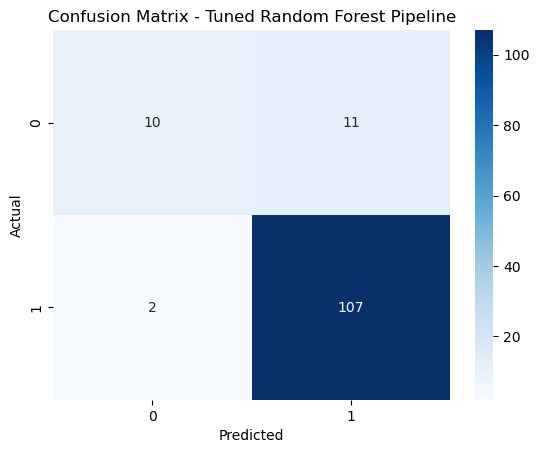

In [59]:
cm = confusion_matrix(y_test, best_rf_pipeline.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest Pipeline")
plt.show()


### Tree Visualization

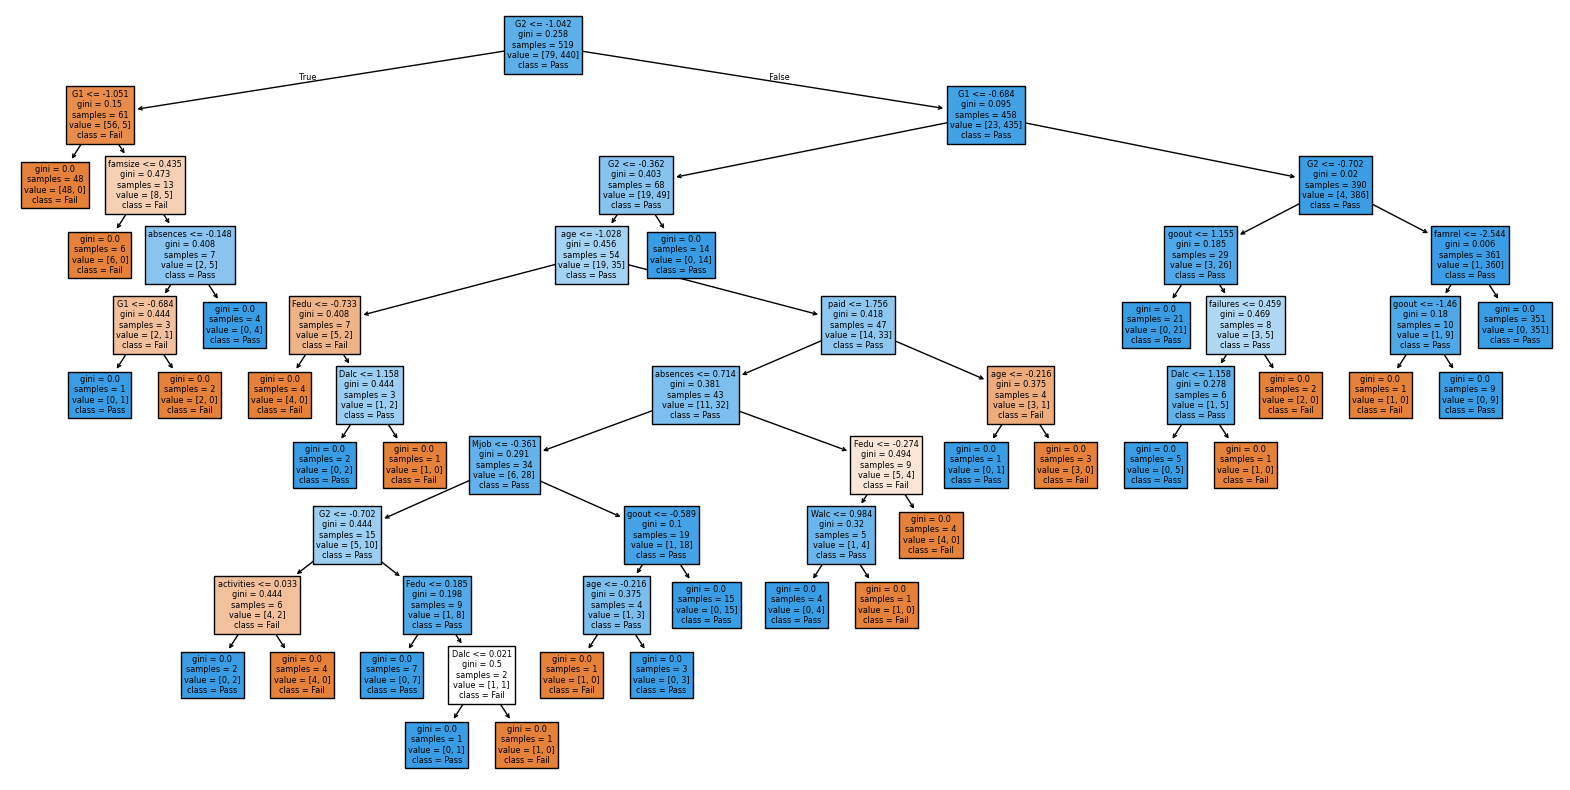

In [62]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_pipeline.named_steps["model"],
    feature_names=X.columns,
    class_names=["Fail", "Pass"],
    filled=True
)
plt.show()


## Feature Importance

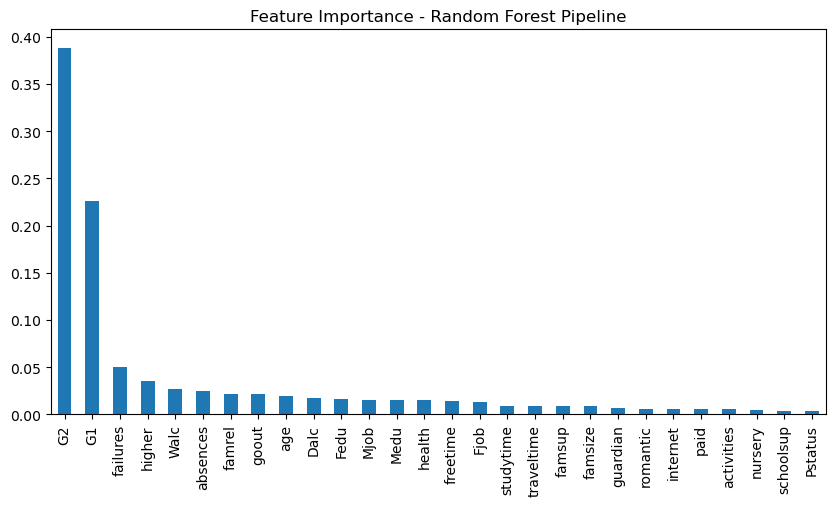

In [60]:
importances = best_rf_pipeline.named_steps["model"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feat_imp.plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance - Random Forest Pipeline")
plt.show()


## Conclusion

This project demonstrates the effectiveness of tree-based models in predicting
student academic performance.

Random Forest outperformed the Decision Tree due to ensemble learning,
reducing overfitting and improving generalization.

Key influential features include:
- G1, G2: (first period grade, second period grade)
- Past failures
- Absences

These insights can help educators identify at-risk students early
and implement targeted academic interventions.
